In [1]:
import sys
import pathlib

sys.path.append(str(pathlib.Path(sys.path[0]).parent / "libs"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import qutip
import joblib

In [3]:
%reload_ext autoreload
%autoreload 2

import bec
import entanglement_propagation
from tools.jupyter import print_model_info

## Энропия между концами цепочкек различной длины

In [4]:
%%time

n_bosons = 20
i_projection = n_bosons

tspan = np.linspace(0, 1.5, 301)

entropy_vn_spans = [
    (
        m_sites_,
        joblib.Parallel(n_jobs=-2)(
            joblib.delayed(entanglement_propagation.rho_b_ent)(
                t,
                p=i_projection,
                k=(n_bosons,) * (m_sites_ // 2 - ((m_sites_ + 1) % 2)),
                m=m_sites_,
                n=n_bosons,
            )
            for t in tqdm(tspan)
        ),
    )
    for m_sites_ in [3, 4, 5]
]

100%|██████████| 301/301 [01:29<00:00,  3.35it/s]


CPU times: user 597 ms, sys: 250 ms, total: 847 ms
Wall time: 3min 9s


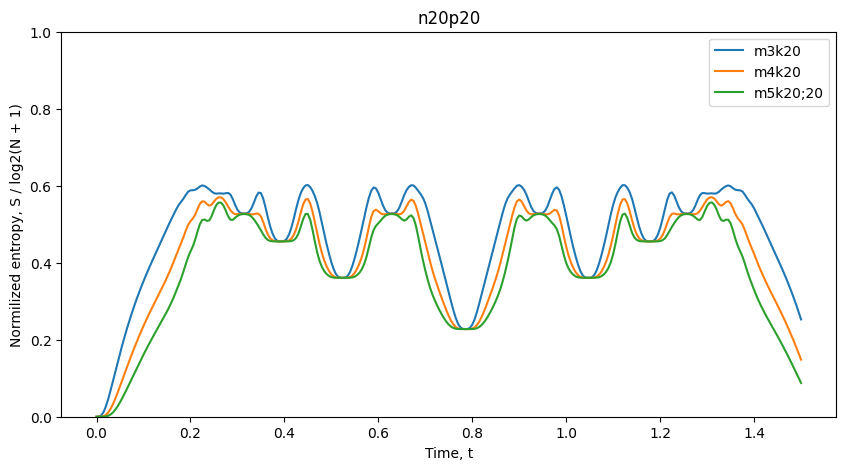

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for m_sites_, entropy_vn_span in entropy_vn_spans:
    label = f"m{m_sites_}k{';'.join(map(str, (n_bosons,) * (m_sites_ // 2 - ((m_sites_ + 1) % 2))))}"
    ax.plot(tspan, entropy_vn_span / np.log2(n_bosons + 1), label=label)


ax.set_title(f"n{n_bosons}p{i_projection}")
ax.set_ylabel("Normilized entropy, S / log2(N + 1)")
ax.set_xlabel("Time, t")
ax.set_ylim(0, 1)
ax.legend()

plt.savefig("../../assets/entropy_vn_span" + f"_p{i_projection}n{n_bosons}mX" + ".pdf")

## Энропия между концами цепочкек с различным случаями измерения

### В результате измерения все нули

In [6]:
%%time

n_bosons = 20
i_projection = 0

tspan = np.linspace(0, 1.5, 301)

entropy_vn_spans = [
    (
        m_sites_,
        (k_mesuared_ := ((0,) * (m_sites_ // 2 - ((m_sites_ + 1) % 2)))),
        joblib.Parallel(n_jobs=-2)(
            joblib.delayed(entanglement_propagation.rho_b_ent)(
                t,
                p=i_projection,
                k=k_mesuared_,
                m=m_sites_,
                n=n_bosons,
            )
            for t in tqdm(tspan)
        ),
    )
    for m_sites_ in [3, 4, 5]
]

100%|██████████| 301/301 [01:45<00:00,  2.85it/s]


CPU times: user 710 ms, sys: 277 ms, total: 987 ms
Wall time: 3min 45s


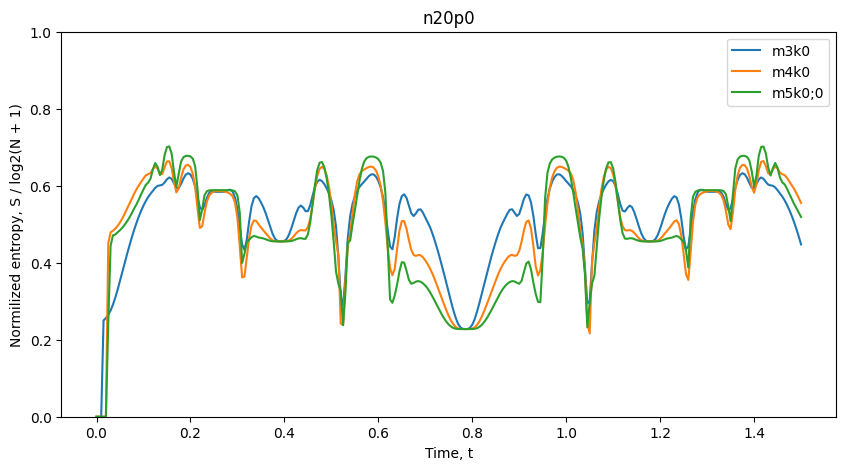

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for m_sites_, k_mesuared_, entropy_vn_span in entropy_vn_spans:
    label = f"m{m_sites_}k{';'.join(map(str, k_mesuared_))}"
    ax.plot(tspan, entropy_vn_span / np.log2(n_bosons + 1), label=label)


ax.set_title(f"n{n_bosons}p{i_projection}")
ax.set_ylabel("Normilized entropy, S / log2(N + 1)")
ax.set_xlabel("Time, t")
ax.set_ylim(0, 1)
ax.legend()

plt.savefig("../../assets/entropy_vn_span" + f"_p{i_projection}n{n_bosons}mX" + ".pdf")

### В результате измерения случайная последовательность 

In [8]:
%%time

n_bosons = 20
i_projection = 0
k_mesuared = [13, 1, 19, 16, 6, 5, 6]

tspan = np.linspace(0, 1.5, 301)

entropy_vn_spans = [
    (
        m_sites_,
        (k_mesuared_ := k_mesuared[:(m_sites_ // 2 - ((m_sites_ + 1) % 2))]),
        joblib.Parallel(n_jobs=-2)(
            joblib.delayed(entanglement_propagation.rho_b_ent)(
                t,
                p=i_projection,
                k=k_mesuared_,
                m=m_sites_,
                n=n_bosons,
            )
            for t in tqdm(tspan)
        ),
    )
    for m_sites_ in [3, 4, 5]
]

100%|██████████| 301/301 [01:47<00:00,  2.80it/s]


CPU times: user 955 ms, sys: 247 ms, total: 1.2 s
Wall time: 4min 9s


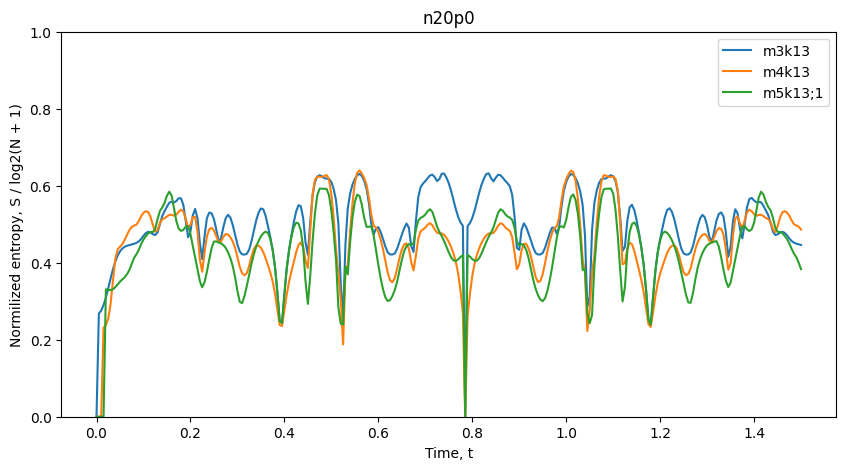

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for m_sites_, k_mesuared_, entropy_vn_span in entropy_vn_spans:
    label = f"m{m_sites_}k{';'.join(map(str, k_mesuared_))}"
    ax.plot(tspan, entropy_vn_span / np.log2(n_bosons + 1), label=label)


ax.set_title(f"n{n_bosons}p{i_projection}")
ax.set_ylabel("Normilized entropy, S / log2(N + 1)")
ax.set_xlabel("Time, t")
ax.set_ylim(0, 1)
ax.legend()

plt.savefig("../../assets/entropy_vn_span" + f"_p{i_projection}n{n_bosons}mX" + ".pdf")